<a href="https://colab.research.google.com/github/ahmedchafiq/R137590662_AHMED_CHAFIQ/blob/main/Business_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ayeshaseherr_buisness_sales_path = kagglehub.dataset_download('ayeshaseherr/buisness-sales')

print('Data source import complete.')


Using Colab cache for faster access to the 'buisness-sales' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/buisness-sales/Business_sales_EDA.csv


# Business Sales EDA

## Introduction

This notebook presents an exploratory data analysis (EDA) of the **Business Sales** dataset to understand sales patterns, pricing behavior, and product distribution.

The analysis focuses on:
- Exploring the distribution of sales volume and product prices.
- Analyzing categorical features such as origin, season, section, and product category.
- Visualizing relationships between price and sales volume.
- Identifying trends, patterns, and potential anomalies in the data.

Multiple visualization techniques including histograms, box plots, bar charts, and correlation analysis are used to extract meaningful business insights.

The goal of this analysis is to support data-driven decision making and provide a clear understanding of factors that influence sales performance.


Step 1: Import Required Libraries
We begin by importing essential Python libraries for data manipulation, visualization, and analysis:

pandas: For loading, cleaning, and manipulating structured data in dataframe format
matplotlib: For creating static, high-quality visualizations and plots
plotly: For interactive, web-based visualizations that enable hover details and zooming
seaborn: For statistical data visualization built on top of matplotlib with enhanced aesthetics
numpy: For numerical computations and array operations
%matplotlib inline: Jupyter magic command to display plots directly in notebook cells

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.io as pio

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [4]:
df = pd.read_csv("/kaggle/input/buisness-sales/Business_sales_EDA.csv", delimiter=';', encoding='utf-8')
df

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20247,219627,Front of Store,Yes,clothing,No,1754,Zara,https://www.zara.com/us/en/suit-jacket-in-100-...,CROPPED WASHED T-SHIRT CHARCOAL,Running shoes. Upper in a combination of piece...,31.95,USD,jeans,WOMAN,Summer,Linen Blend,India
20248,219628,Aisle,No,clothing,No,872,Zara,https://www.zara.com/us/en/fleece-overshirt-p0...,SATIN WOVEN LEATHER SLIDES STONE,Slim fit shirt. Round neck and short sleeves.,49.99,USD,jackets,WOMAN,Spring,Linen,China
20249,219629,Aisle,Yes,clothing,No,1360,Zara,https://www.zara.com/us/en/faux-suede-patch-ja...,RELAXED CROPPED LEATHER JACKET CHARCOAL,Ankle boots. Made of leather with a suede fini...,20.99,USD,shoes,WOMAN,Spring,Polyester,China
20250,219630,Aisle,No,clothing,No,892,Zara,https://www.zara.com/us/en/fine-knit-crop-swea...,SLIM BASIC 100% WOOL SWEATER BURGUNDY,RETRO SNEAKERS,64.95,USD,jackets,WOMAN,Winter,Polyester,Spain


## 1. Exploratory Data Analysis (EDA)¶
Dataset Information and missing value

In [5]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


In [6]:
df.tail(10)

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
20242,219622,Aisle,No,clothing,No,854,Zara,https://www.zara.com/us/en/faux-suede-jacket-p...,HIGH-WAIST KNIT V-NECK SWEATER SKY BLUE,Jacket made of faux leather fabric. Rib elasti...,22.95,USD,jackets,WOMAN,Autumn,Wool Blend,Bangladesh
20243,219623,End-cap,Yes,clothing,Yes,1276,Zara,https://www.zara.com/us/en/retro-high-top-snea...,OVERSIZED POCKET PUFFER JACKET STONE,High-top sneakers. Upper in a combination of p...,72.99,USD,jackets,MAN,Winter,Wool,Vietnam
20244,219624,Front of Store,No,clothing,No,972,Zara,https://www.zara.com/us/en/padded-denim-jacket...,REGULAR DOUBLE FACED JACKET KHAKI,Round neck long sleeve sweater. Rib trim.,19.99,USD,sweaters,WOMAN,Autumn,Wool,Turkey
20245,219625,Front of Store,No,clothing,No,926,Zara,https://www.zara.com/us/en/contrasting-patches...,EMBROIDERED COTTON - LINEN BLEND JACKET OLIVE,Ribbed sweater with round neck and long sleeve...,32.95,USD,jackets,MAN,Summer,Cotton,India
20246,219626,End-cap,No,clothing,No,1012,Zara,https://www.zara.com/us/en/washed-effect-bombe...,TEXTURED SUEDE FISHERMAN SANDALS BROWN,Sneakers. Upper in a combination of pieces and...,48.99,USD,jackets,WOMAN,Summer,Cotton,China
20247,219627,Front of Store,Yes,clothing,No,1754,Zara,https://www.zara.com/us/en/suit-jacket-in-100-...,CROPPED WASHED T-SHIRT CHARCOAL,Running shoes. Upper in a combination of piece...,31.95,USD,jeans,WOMAN,Summer,Linen Blend,India
20248,219628,Aisle,No,clothing,No,872,Zara,https://www.zara.com/us/en/fleece-overshirt-p0...,SATIN WOVEN LEATHER SLIDES STONE,Slim fit shirt. Round neck and short sleeves.,49.99,USD,jackets,WOMAN,Spring,Linen,China
20249,219629,Aisle,Yes,clothing,No,1360,Zara,https://www.zara.com/us/en/faux-suede-patch-ja...,RELAXED CROPPED LEATHER JACKET CHARCOAL,Ankle boots. Made of leather with a suede fini...,20.99,USD,shoes,WOMAN,Spring,Polyester,China
20250,219630,Aisle,No,clothing,No,892,Zara,https://www.zara.com/us/en/fine-knit-crop-swea...,SLIM BASIC 100% WOOL SWEATER BURGUNDY,RETRO SNEAKERS,64.95,USD,jackets,WOMAN,Winter,Polyester,Spain
20251,219631,Aisle,No,clothing,No,859,Zara,https://www.zara.com/us/en/contrasting-patches...,KNIT TUXEDO JACKET BURGUNDY,Relaxed fit overshirt made of linen fabric. La...,64.99,USD,shoes,MAN,Summer,Linen,Turkey


In [7]:
df.describe()

,Product ID,Sales Volume,price
count,20252.000000,20252.000000,20252.000000
mean,208931.432303,1097.400454,41.949061
std,8961.076507,298.234609,23.380960
min,110075.000000,518.000000,12.000000
25%,204442.750000,849.000000,23.950000
50%,209505.500000,990.000000,35.950000
75%,214568.250000,1364.250000,53.950000
max,219631.000000,1940.000000,134.990000


In [8]:
df.describe(include = "O")

,Product Position,Promotion,Product Category,Seasonal,brand,url,name,description,currency,terms,section,season,material,origin
count,20252,20252,20252,20252,20252,20252,20251,20250,20252,20252,20252,20252,20252,20252
unique,3,2,1,2,1,228,17215,221,1,5,2,4,11,12
top,Aisle,No,clothing,No,Zara,https://www.zara.com/us/en/knit-sweater-with-r...,PLAID OVERSHIRT,Varsity jacket with elastic collar and long sl...,USD,jackets,WOMAN,Autumn,Cotton,China
freq,7810,11812,20252,10136,20252,187,8,333,20252,11232,13254,7665,3851,4026


In [9]:
df.count()

,0
Product ID,20252
Product Position,20252
Promotion,20252
Product Category,20252
Seasonal,20252
Sales Volume,20252
brand,20252
url,20252
name,20251
description,20250


In [10]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
20247,False
20248,False
20249,False
20250,False


In [11]:
df.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'name', 'description',
       'price', 'currency', 'terms', 'section', 'season', 'material',
       'origin'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        20252 non-null  int64  
 1   Product Position  20252 non-null  object 
 2   Promotion         20252 non-null  object 
 3   Product Category  20252 non-null  object 
 4   Seasonal          20252 non-null  object 
 5   Sales Volume      20252 non-null  int64  
 6   brand             20252 non-null  object 
 7   url               20252 non-null  object 
 8   name              20251 non-null  object 
 9   description       20250 non-null  object 
 10  price             20252 non-null  float64
 11  currency          20252 non-null  object 
 12  terms             20252 non-null  object 
 13  section           20252 non-null  object 
 14  season            20252 non-null  object 
 15  material          20252 non-null  object 
 16  origin            20252 non-null  object

In [13]:
df.isna().sum()

,0
Product ID,0
Product Position,0
Promotion,0
Product Category,0
Seasonal,0
Sales Volume,0
brand,0
url,0
name,1
description,2


### Sales Volume Distribution

This histogram visualizes how sales volume values are distributed across the dataset.  
It helps identify common sales ranges, data spread, and potential outliers.


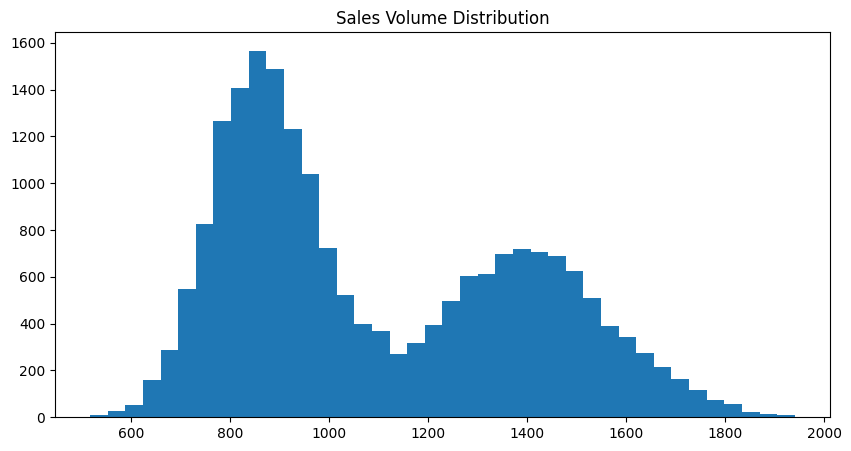

In [14]:
plt.figure(figsize=(10,5))
plt.hist(df['Sales Volume'], bins=40)
plt.title('Sales Volume Distribution')
plt.show()


### Frequency of Product Origin

This bar chart shows how often each product origin appears in the dataset.  
Rotating the x-axis labels improves readability and prevents overlap.


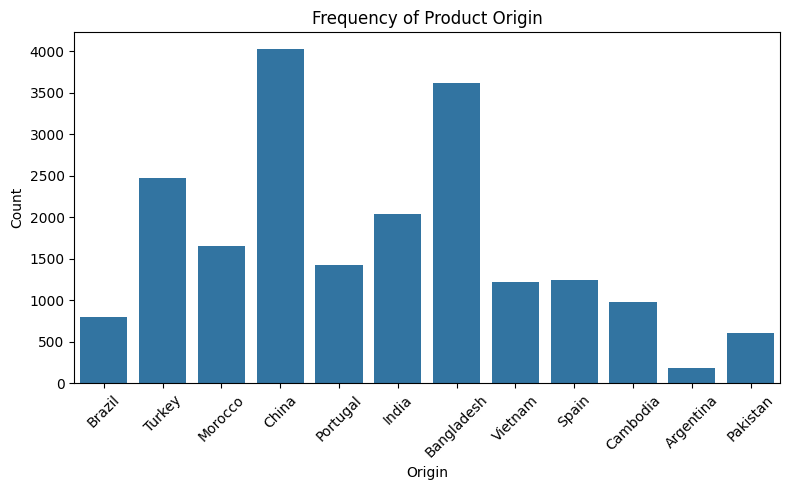

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x="origin", data=df)

plt.title("Frequency of Product Origin")
plt.xlabel("Origin")
plt.ylabel("Count")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Frequency of Season

This count plot shows how frequently each season appears in the dataset.  
It helps identify seasonal patterns in the data distribution.


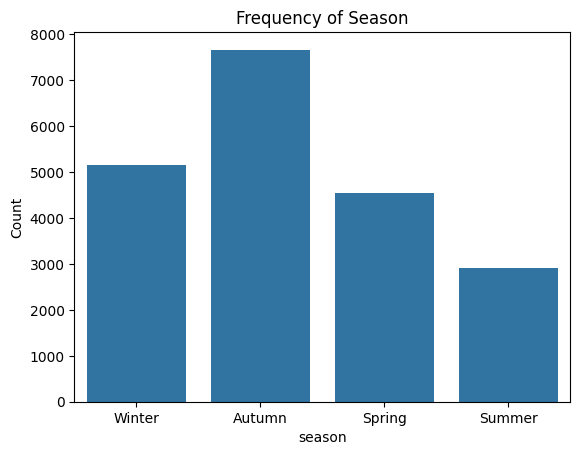

In [16]:
sns.countplot(x="season", data=df)
plt.title(f"Frequency of Season")
plt.xlabel("season")
plt.ylabel("Count")
plt.show()

### Frequency of Section

This horizontal bar chart shows how each section is distributed in the dataset.  
It makes it easier to compare category frequencies across sections.


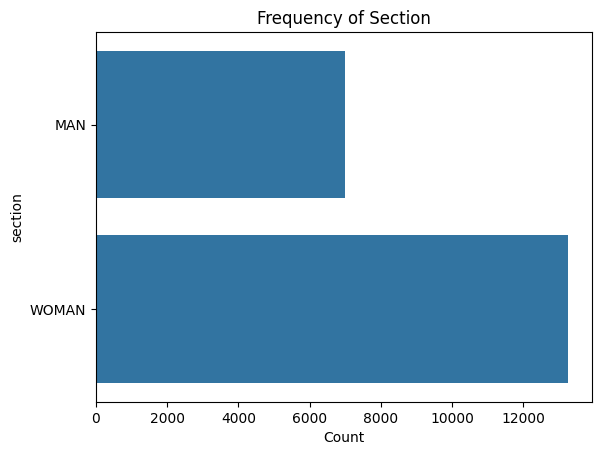

In [17]:
sns.countplot(y="section", data=df)
plt.title(f"Frequency of Section")
plt.ylabel("section")
plt.xlabel("Count")
plt.show()

## Exploratory Data Analysis (EDA) Visualizations

### 1. Distribution of Sales Volume and Price
The histograms with KDE curves show the distribution of **Sales Volume** and **Price**.
They help identify:
- The shape of the distribution (normal, skewed, etc.).
- Common value ranges.
- Potential outliers.

### 2. Sales Volume by Product Category
The box plot compares **Sales Volume** across different product categories.
It highlights:
- The median sales per category.
- Variability and spread.
- Outliers within each category.

### 3. Pair Plot of Numerical Features
The pair plot visualizes relationships between all numerical features.
It is useful for:
- Detecting correlations.
- Observing linear or non-linear trends.
- Identifying feature interactions.

*(Displayed only if there are enough numerical columns.)*

### 4. Correlation Heatmap
The heatmap shows correlation coefficients between numerical variables.
It helps:
- Identify strongly related features.
- Detect multicollinearity.
- Understand feature dependencies.

*(Displayed only if there are enough numerical columns.)*


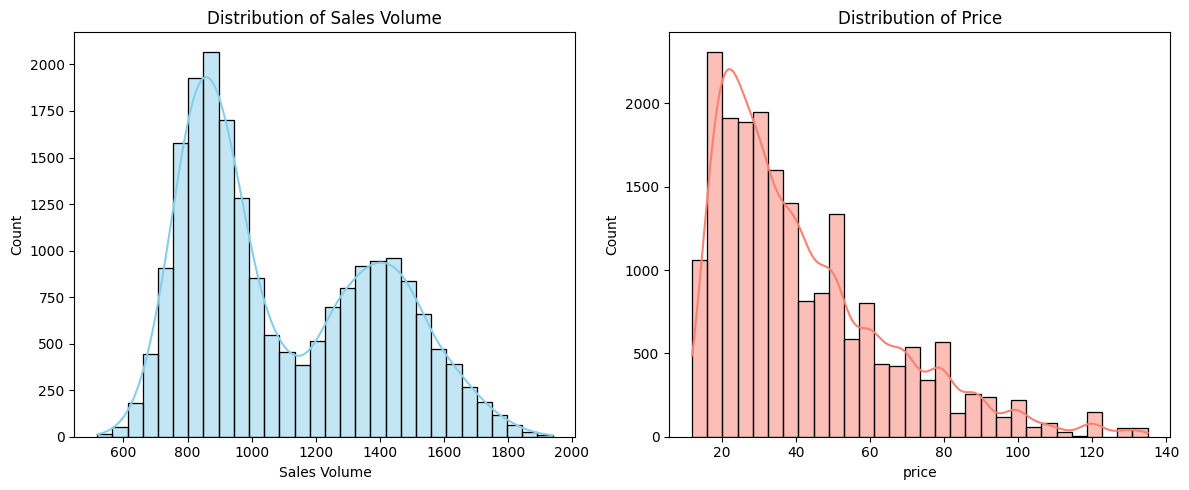

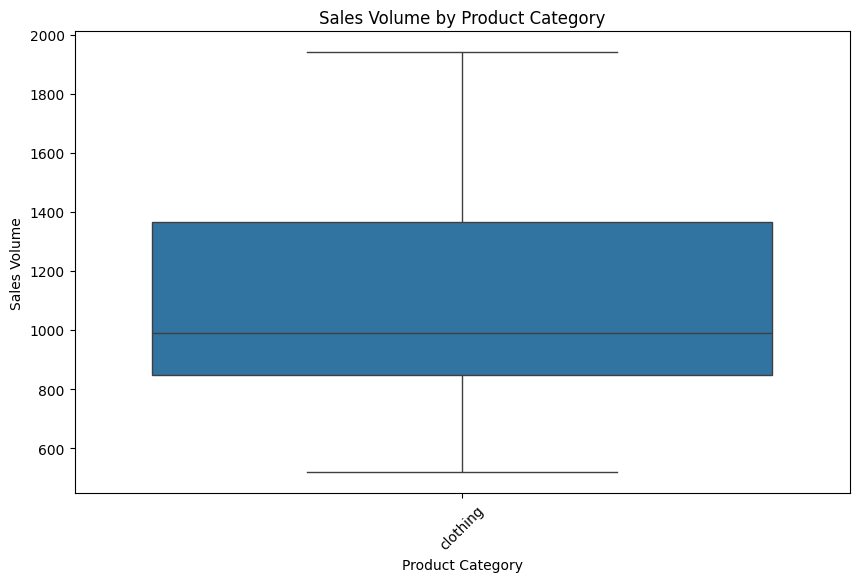

Not enough numeric columns for a pair plot.
Not enough numeric columns for a correlation heatmap.


In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Sales Volume'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sales Volume')

plt.subplot(1, 2, 2)
sns.histplot(df['price'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Product Category', y='Sales Volume', data=df)
plt.title('Sales Volume by Product Category')
plt.xticks(rotation=45)
plt.show()

numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    sns.pairplot(numeric_df)
    plt.show()
else:
    print('Not enough numeric columns for a pair plot.')

if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(8, 6))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

### Origin vs Price

This bar chart shows the relationship between product origin and price.  
It compares prices across different origins and highlights differences between categories.


In [19]:
pio.renderers.default = "iframe"

fig = px.bar(
    df,
    x='origin',
    y='price',
    title='Origin and Price',
    color='origin'
)

iplot(fig)

### Pair Plot for Sales Volume and Price

This pair plot visualizes the relationship between **Sales Volume** and **Price**.  
The diagonal KDE plots show the distribution of each variable, while the scatter plot shows their interaction.


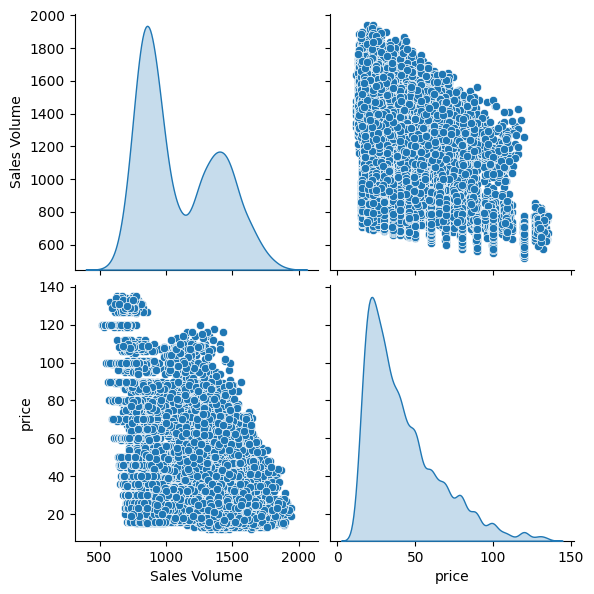

In [20]:
num_cols = ["Sales Volume", "price"]

sns.pairplot(df[num_cols], diag_kind="kde", height=3)
plt.show()